In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

np.random.seed(42)

task_durations = [x for x in range(11)]
task_priorities = [x for x in range(11)]
robot_efficiencies = [0.1,0.01,0.2,0.3,0.4]

def generate_mock_data(num_tasks=10, num_robots=5):
    task_durations = np.random.randint(1, 11, size=num_tasks)
    task_priorities = np.random.randint(1, 6, size=num_tasks)
    robot_efficiencies = np.random.uniform(0.5, 1.5, size=num_robots)
    return task_durations, task_priorities, robot_efficiencies


In [12]:

# GA algorithm
def run_genetic_algorithm(task_durations, task_priorities, robot_efficiencies):
    population_size = 50
    n_generations = 100
    population = [np.random.randint(0, len(robot_efficiencies), size=len(task_durations)) for _ in range(population_size)]

    best_fitness = -np.inf
    best_solution = None

    for _ in range(n_generations):
        # Evaluate fitness for each individual in the population
        fitness_values = [calculate_fitness(individual, task_durations, task_priorities, robot_efficiencies) for individual in population]

        # Select the best individual (solution) based on fitness
        idx_best_individual = np.argmax(fitness_values)
        if fitness_values[idx_best_individual] > best_fitness:
            best_fitness = fitness_values[idx_best_individual]
            best_solution = population[idx_best_individual]


    return best_solution if best_solution is not None else population[0]
def tournament_selection(population, fitness_values, tournament_size=3):
    selected_parents = []
    for _ in range(2):  # Select 2 parents
        tournament = np.random.choice(len(population), tournament_size, replace=False)
        winner_index = max(tournament, key=lambda i: fitness_values[i])
        selected_parents.append(population[winner_index])
    return selected_parents

# Crossover operation (Single-Point Crossover)
def single_point_crossover(parent1, parent2):
    crossover_point = np.random.randint(1, len(parent1) - 1)
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2

# Mutation operation (Task Swapping)
def task_swapping_mutation(individual,mutation_rate=0.1):
    mutated_individual = individual.copy()
    idx1, idx2 = np.random.choice(len(individual), 2, replace=False)
    mutated_individual[idx1], mutated_individual[idx2] = mutated_individual[idx2], mutated_individual[idx1]
    return mutated_individual

# Modified fitness function
def calculate_fitness(solution, task_durations, task_priorities, robot_efficiencies):
    robot_times = []
    for robot_id in np.unique(solution):
        tasks_for_robot = np.where(solution == robot_id)[0]
        time_for_robot = np.sum(task_durations[tasks_for_robot] / robot_efficiencies[robot_id])
        robot_times.append(time_for_robot)

    T_total = np.max(robot_times)
    B = np.std(robot_times)
    weighted_total_time = np.sum([task_durations[i] * task_priorities[i] for i in range(len(task_durations))])
    F = 1 / (T_total + B + weighted_total_time)  # Modified fitness function

    return F


In [22]:

def visualize_assignments_improved(solution, task_durations, task_priorities, robot_efficiencies):
    # Create a grid for visualization based on the solution provided
    grid = np.zeros((len(robot_efficiencies), len(task_durations)))
    for task_idx, robot_idx in enumerate(solution):
        grid[robot_idx, task_idx] = task_durations[task_idx]

        cmap = mcolors.LinearSegmentedColormap.from_list("", [(1, 1, 1), (0.6, 0, 0)])

    fig, ax = plt.subplots(figsize=(12, 6))
    cax = ax.matshow(grid, cmap=cmap)
    fig.colorbar(cax, label='Task Duration (hours)')

    for i in range(len(robot_efficiencies)):
        for j in range(len(task_durations)):
            ax.text(j, i, f'P{task_priorities[j]}\n{task_durations[j]}h', ha='center', va='center', color='black')

    # Set the ticks and labels for tasks and robots
    ax.set_xticks(np.arange(len(task_durations)))
    ax.set_yticks(np.arange(len(robot_efficiencies)))
    ax.set_xticklabels([f'Task {i+1}' for i in range(len(task_durations))], rotation=45, ha="left")
    ax.set_yticklabels([f'Robot {i+1} (Efficiency: {eff:.2f})' for i, eff in enumerate(robot_efficiencies)])

    plt.xlabel('Tasks')
    plt.ylabel('Robots')
    plt.title('Task Assignments with Task Duration and Priority')

    priority_patches = [mpatches.Patch(color='white', label=f'Priority {i}') for i in range(1, 6)]
    plt.legend(handles=priority_patches, bbox_to_anchor=(1.20, 1), loc='upper left', title="Task Priorities")
    plt.figtext(0.5, -0.2,s="This is the output", ha='center', fontsize=10, wrap=True)

    plt.tight_layout()
    plt.show()


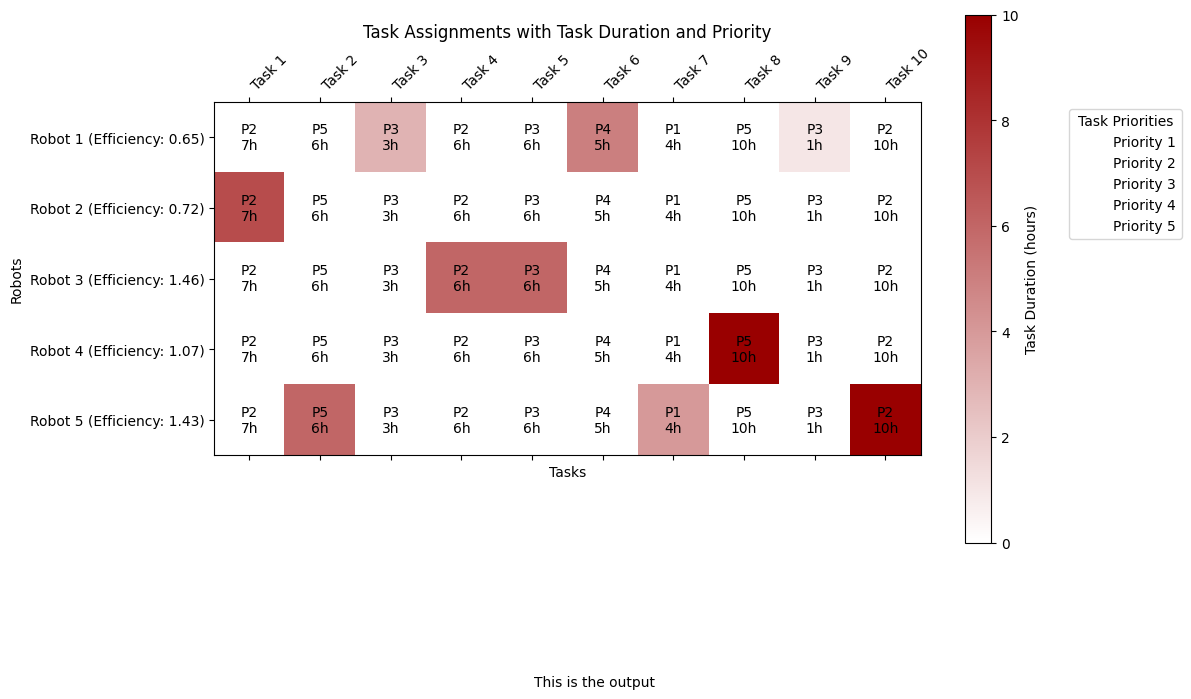

In [23]:
# Main execution
if __name__ == "__main__":
    num_tasks = 10
    num_robots = 5
    task_durations, task_priorities, robot_efficiencies = generate_mock_data(num_tasks, num_robots)

    # Run GA to find the best solution
    best_solution = run_genetic_algorithm(task_durations, task_priorities, robot_efficiencies)

    # Visualize the initial random assignment
    visualize_assignments_improved(best_solution, task_durations, task_priorities, robot_efficiencies)
